**Ensemble learning** - is used to improve machine learning result by combining multiple models 

**Note** - Model can have different machine learning algorithms

Bagging vs Boosting

**Bagging Algorithms**

Bootstrap Aggregation or bagging involves taking multiple samples from your training dataset (with replacement) and training a model for each sample.

The final output prediction is averaged across the predictions of all of the sub-models.

The three bagging models covered in this section are as follows:

Bagged Decision Trees

Random Forest

Extra Trees

**Note** - Bagging and Boosting can be used for regression as well as classification

**Boosting Algorithms**

Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes of the models before them in the sequence.

Once created, the models make predictions that may be weighted by their demonstrated accuracy and the results are combined to create a final output prediction.

The two most common boosting ensemble machine learning algorithms are:

AdaBoost

XGBoost

CatBoost

Stochastic Gradient Boosting

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
df=pd.read_csv("heart_disease.csv")

In [53]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [54]:
df.shape

(253680, 22)

In [55]:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Feature Selection

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [57]:
for i in df.columns:
 print(i)
 print(df[i].unique())
 print()

HeartDiseaseorAttack
[0. 1.]

HighBP
[1. 0.]

HighChol
[1. 0.]

CholCheck
[1. 0.]

BMI
[40. 25. 28. 27. 24. 30. 34. 26. 33. 21. 23. 22. 38. 32. 37. 31. 29. 20.
 35. 45. 39. 19. 47. 18. 36. 43. 55. 49. 42. 17. 16. 41. 44. 50. 59. 48.
 52. 46. 54. 57. 53. 14. 15. 51. 58. 63. 61. 56. 74. 62. 64. 66. 73. 85.
 60. 67. 65. 70. 82. 79. 92. 68. 72. 88. 96. 13. 81. 71. 75. 12. 77. 69.
 76. 87. 89. 84. 95. 98. 91. 86. 83. 80. 90. 78.]

Smoker
[1. 0.]

Stroke
[0. 1.]

Diabetes
[0. 2. 1.]

PhysActivity
[0. 1.]

Fruits
[0. 1.]

Veggies
[1. 0.]

HvyAlcoholConsump
[0. 1.]

AnyHealthcare
[1. 0.]

NoDocbcCost
[0. 1.]

GenHlth
[5. 3. 2. 4. 1.]

MentHlth
[18.  0. 30.  3.  5. 15. 10.  6. 20.  2. 25.  1.  4.  7.  8. 21. 14. 26.
 29. 16. 28. 11. 12. 24. 17. 13. 27. 19. 22.  9. 23.]

PhysHlth
[15.  0. 30.  2. 14. 28.  7. 20.  3. 10.  1.  5. 17.  4. 19.  6. 12. 25.
 27. 21. 22.  8. 29. 24.  9. 16. 18. 23. 13. 26. 11.]

DiffWalk
[1. 0.]

Sex
[0. 1.]

Age
[ 9.  7. 11. 10.  8. 13.  4.  6.  2. 12.  5.  1.  3.]

E

In [58]:
for i in df.columns:
  df[i]=df[i].astype(int)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   Diabetes              253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

Correlation graph

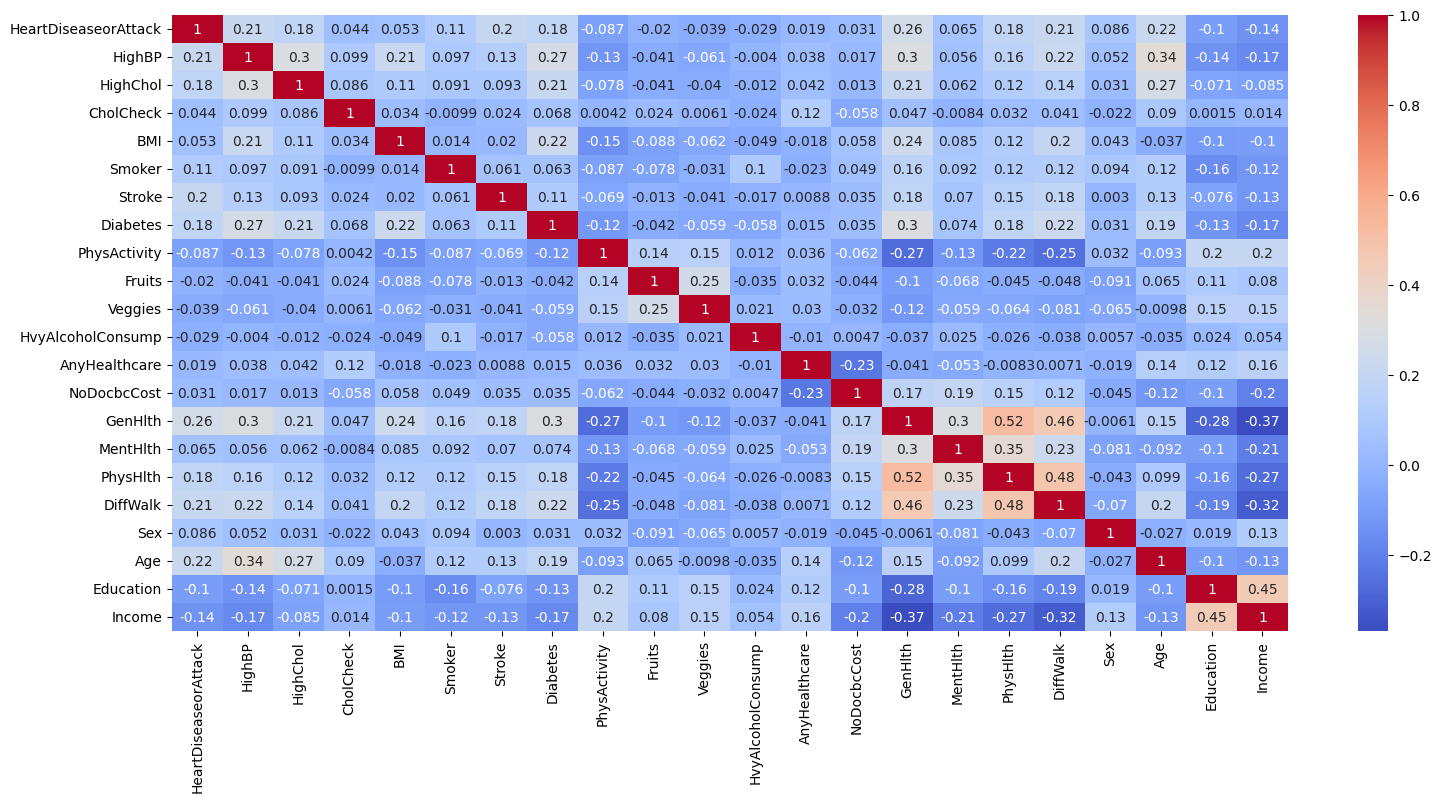

In [60]:
plt.figure(figsize=(18,8))
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

In [61]:
X=df.drop(columns=["HeartDiseaseorAttack"])
y=df["HeartDiseaseorAttack"]

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.2,random_state=42)

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
sc=StandardScaler()

In [65]:
x_train= sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [66]:
#Simple decision tree


In [67]:
from sklearn.tree import DecisionTreeClassifier
model_ = DecisionTreeClassifier()
model_.fit(x_train, y_train)
pred_ = model_.predict(x_test)

In [68]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
accuracy_score(y_test, pred_)

0.8477905234941658

# Bagging Classifier, RandomForest, and ExtraTreesClassifier

Bagging Classifier, RandomForest, and ExtraTreesClassifier are ensemble learning methods that use a combination of multiple individual models to make predictions. They are all based on the concept of decision trees and aim to improve the overall accuracy and robustness of the predictions. However, there are some differences among these methods:

**BaggingClassifier**: It stands for Bootstrap Aggregating. It creates an ensemble by training multiple instances of a base estimator (e.g., decision trees) on different subsets of the training data, which are generated through bootstrap sampling (sampling with replacement). Each base estimator is trained independently, and the final prediction is obtained by averaging the predictions of all base estimators (for regression) or by voting (for classification). BaggingClassifier reduces variance and helps to prevent overfitting. It can work with any base estimator.

**Random Forest**: It is an extension of the bagging method. Like BaggingClassifier, it creates an ensemble of base estimators through bootstrap sampling. However, in Random Forest, each base estimator (decision tree) is trained on a random subset of features, rather than using all the features. This random subset of features helps to decorrelate the base estimators and increase the diversity of the ensemble. The final prediction in Random Forest is obtained by averaging the predictions of all base estimators (for regression) or by voting (for classification).

**ExtraTreesClassifier**: It is similar to Random Forest but with some key differences. Like Random Forest, it also creates an ensemble of base estimators through bootstrap sampling and random feature selection. However, ExtraTreesClassifier takes the random feature selection one step further. While Random Forest only considers a random subset of features at each split point, ExtraTreesClassifier considers all features and randomly selects the best split. This additional randomness leads to faster training times but can result in slightly higher bias. The final prediction in ExtraTreesClassifier is obtained by averaging the predictions of all base estimators (for regression) or by voting (for classification).

In summary, BaggingClassifier builds an ensemble by training multiple instances of a base estimator on different bootstrap samples, while Random Forest and ExtraTreesClassifier are variations of BaggingClassifier that introduce additional randomization in the training process, such as random feature selection. Random Forest uses a random subset of features at each split point, while ExtraTreesClassifier considers all features and randomly selects the best split.

#Random Forest v/s Extra trees


**Randomness in feature selection**: Random Forest randomly selects a subset of features at each split point of a decision tree, considering the best split among them. Extra Trees, on the other hand, randomly selects random thresholds for each feature and selects the best split based on these random thresholds. In essence, Extra Trees adds an additional level of randomness in the selection of both features and thresholds, making it even more random than Random Forest.

**Bootstrap sampling**: Random Forest uses bootstrap sampling, which means that each decision tree in the forest is trained on a random subset of the original training data with replacement. Extra Trees, however, does not use bootstrap sampling. It selects random subsets of the training data without replacement for each decision tree.

In [69]:
# Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

In [71]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [72]:
confusion_matrix(y_pred,y_test)

array([[181732,  17272],
       [  2147,   1793]])

In [73]:
accuracy_score(y_test,y_pred)

0.9043135052034059

In [74]:
from sklearn.metrics import classification_report

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95    183879
           1       0.46      0.09      0.16     19065

    accuracy                           0.90    202944
   macro avg       0.68      0.54      0.55    202944
weighted avg       0.87      0.90      0.87    202944



In [76]:
# Bagged Decision Trees

In [77]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [78]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier(base_estimator=tree, n_estimators=100, random_state=42)
bc.fit(x_train,y_train)
y_pred=bc.predict(x_test)
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.92      0.98      0.95    183879
           1       0.40      0.14      0.21     19065

    accuracy                           0.90    202944
   macro avg       0.66      0.56      0.58    202944
weighted avg       0.87      0.90      0.88    202944



In [79]:
accuracy_score(y_test,y_pred)

0.899750670135604

In [80]:
# Extra Trees

In [81]:
from sklearn.ensemble import ExtraTreesClassifier

In [82]:
et=ExtraTreesClassifier(n_estimators=100, max_features=15, random_state=42)
et.fit(x_train,y_train)
y_pred=et.predict(x_test)

In [83]:
accuracy_score(y_test,y_pred)

0.8913739750867234

In [84]:
confusion_matrix(y_test,y_pred)

array([[177539,   6340],
       [ 15705,   3360]])

In [85]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94    183879
           1       0.35      0.18      0.23     19065

    accuracy                           0.89    202944
   macro avg       0.63      0.57      0.59    202944
weighted avg       0.86      0.89      0.88    202944



In [86]:
# Boosting Algorithms

The **AdaBoost algorithm** works as follows:


**1. Initialization:** Each sample in the training dataset is assigned an equal weight initially.

**2.Training weak learners:** AdaBoost starts by training a weak learner (e.g., decision stump - a simple decision tree with a single split) on the training data. The weak learner aims to perform better than random guessing on the weighted samples.

**3. Weighted error calculation**: After the weak learner is trained, its performance is evaluated by calculating the weighted error. The weighted error is the sum of the weights of the misclassified samples divided by the sum of all weights. It measures how well the weak learner predicts the training samples.

**4. Updating sample weights**: Based on the weighted error, the weights of the misclassified samples are increased, making them more important for subsequent training iterations. Conversely, the weights of correctly classified samples are decreased. This way, the next weak learner will focus more on the previously misclassified samples.

**5. Building the ensemble**: Steps 2-4 are repeated for a specified number of iterations or until a desired level of performance is reached. In each iteration, a new weak learner is trained on the updated weights of the samples. The weak learners are added to the ensemble, and their weights are determined based on their performance.

**6. Final prediction**: To make a prediction on new, unseen data, AdaBoost combines the predictions of all weak learners in the ensemble. The contribution of each weak learner is determined by its performance during training (weighted by its weight in the ensemble). Typically, a weighted majority voting or weighted average is used to combine the predictions.



**Here are some of the advantages of using AdaBoost:**

It can be used with a variety of weak learners, making it a versatile algorithm.
It can be effective for problems where the data is imbalanced or noisy.
It can be used to improve the performance of other machine learning algorithms.


**Here are some of the disadvantages of using AdaBoost:**

It can be computationally expensive to train.
It can be sensitive to the choice of hyperparameters.
It can be difficult to interpret the results of AdaBoost.

In [87]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(n_estimators=100)
abc.fit(x_train,y_train)
y_pred=abc.predict(x_test)

In [88]:
accuracy_score(y_test,y_pred)

0.9073488252917061

# Gradient Boosting

Here's a step-by-step explanation of how Gradient Boosting works:

**Initialization**: A simple model is created, usually in the form of a decision tree with a fixed number of levels (depth) or leaves. This model is often called the "base model" or "initial model."

**Residual Calculation**: The initial model is used to make predictions on the training data. The residuals, which are the differences between the actual and predicted values, are calculated for each training sample. Initially, these residuals are the target variable itself.

**Training weak learners:** A new weak learner (decision tree) is trained to predict the residuals from the previous step. The goal is to fit the new model to the residuals, capturing the patterns that the initial model missed.

**Updating the ensemble:** The newly trained weak learner is added to the ensemble, and its predictions are combined with the predictions of the previous models. The predictions are weighted according to the learning rate, which controls the contribution of each weak learner to the final prediction. The learning rate is a hyperparameter that determines how much each new model contributes to the ensemble.

**Residual Update**: The residuals are updated by subtracting the predictions of the newly added weak learner. This step refines the residuals, making them closer to the true underlying patterns in the data.

**Iteration**: Steps 3-5 are repeated for a specified number of iterations or until a predefined stopping criterion is met. Each iteration adds a new weak learner to the ensemble, updating the ensemble's predictions and refining the residuals.

**Final prediction:** To make predictions on new, unseen data, the ensemble of weak learners is used. The predictions of all weak learners are combined, typically by averaging them, to obtain the final prediction.



**Here are some of the advantages of using SGB:**

It is a powerful algorithm that can be used to solve a variety of problems.

It can be effective for problems where the data is noisy or where there are a large number of features.

It is relatively easy to implement.

**Here are some of the disadvantages of using SGB:**

It can be computationally expensive to train.

It can be sensitive to the choice of hyperparameters.

It can be difficult to interpret the results of SGB.

In [89]:
# Stochastic Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc.fit(x_train,y_train)
y_pred=gbc.predict(x_test)

In [90]:
accuracy_score(y_test,y_pred)

0.9080288158309682

In [91]:
# XGBoost

# XG boost

Here are some key features and aspects of XGBoost:

**Gradient Boosting Framework:** XGBoost follows the general principle of Gradient Boosting. It creates an ensemble of weak learners (typically decision trees) and iteratively improves their predictions by minimizing a loss function through gradient descent.

**Regularization Techniques**: XGBoost incorporates advanced regularization techniques to prevent overfitting and enhance the generalization ability of the model. It includes both L1 and L2 regularization terms (also known as "Lasso" and "Ridge" regularization, respectively) to control the complexity of the model.

**Optimized Tree Construction:** XGBoost employs a more efficient approach to construct decision trees. It uses a technique called "column block" to parallelize the tree construction process and optimize memory usage. This significantly speeds up the training process, making XGBoost faster than traditional Gradient Boosting implementations.

**Handling Missing Values**: XGBoost has built-in capabilities to handle missing values in the dataset. It automatically learns how to treat missing values during the tree construction process, rather than requiring imputation or explicit handling of missing data by the user.

**Parallelization and Distributed Computing:** XGBoost supports parallelization, which leverages multiple CPU cores during training to speed up the process. Additionally, XGBoost can be run in a distributed computing environment, allowing it to scale efficiently to large datasets and clusters of machines.

**Optimization Objectives and Evaluation Metrics:** XGBoost provides a wide range of optimization objectives and evaluation metrics to suit different machine learning tasks. It supports common objectives like regression, classification, and ranking, along with various evaluation metrics such as mean squared error (MSE), log loss, and area under the curve (AUC).

**Feature Importance and Selection**: XGBoost enables the estimation of feature importance, which helps in understanding the relative contribution of different features in the model's predictions. This information can be used for feature selection or to gain insights into the dataset.

Integration with Other Tools and Libraries: XGBoost can be easily integrated with other popular machine learning frameworks and tools such as scikit-learn, Apache Spark, and TensorFlow. This allows for seamless integration into existing machine learning pipelines and workflows.

In [92]:
from xgboost import XGBClassifier

In [93]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)

In [94]:
accuracy_score(y_test,y_pred)

0.9045549511195207

In [95]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [96]:
# CatBoost

In [97]:
from catboost import CatBoostClassifier

In [98]:
cbc= CatBoostClassifier()
cbc.fit(x_train,y_train)
y_pred=cbc.predict(x_test)

Learning rate set to 0.055094
0:	learn: 0.6298879	total: 12.4ms	remaining: 12.4s
1:	learn: 0.5721674	total: 26.2ms	remaining: 13.1s
2:	learn: 0.5274697	total: 38.8ms	remaining: 12.9s
3:	learn: 0.4872704	total: 51.2ms	remaining: 12.7s
4:	learn: 0.4536022	total: 64.4ms	remaining: 12.8s
5:	learn: 0.4288739	total: 78.2ms	remaining: 13s
6:	learn: 0.4026599	total: 93.8ms	remaining: 13.3s
7:	learn: 0.3819929	total: 107ms	remaining: 13.2s
8:	learn: 0.3630138	total: 120ms	remaining: 13.2s
9:	learn: 0.3493467	total: 132ms	remaining: 13.1s
10:	learn: 0.3358598	total: 146ms	remaining: 13.1s
11:	learn: 0.3242985	total: 160ms	remaining: 13.1s
12:	learn: 0.3144536	total: 172ms	remaining: 13.1s
13:	learn: 0.3059649	total: 185ms	remaining: 13s
14:	learn: 0.2995836	total: 202ms	remaining: 13.2s
15:	learn: 0.2927320	total: 216ms	remaining: 13.3s
16:	learn: 0.2877251	total: 229ms	remaining: 13.3s
17:	learn: 0.2838517	total: 242ms	remaining: 13.2s
18:	learn: 0.2789545	total: 256ms	remaining: 13.2s
19:	lear

In [99]:
accuracy_score(y_test,y_pred)

0.9059149321980448